<a href="https://colab.research.google.com/github/Srinidhi1405/RiceLeafDiseaseDetection/blob/main/Rice_leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/ .kaggle

mkdir: cannot create directory ‘/root/’: File exists


In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/kaggle.json


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
data_path = '/content/drive/MyDrive/rice_leaf_diseases'


Step 1: Data Loading

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)



Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


Step 2: CNN Model Definition

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 3: Compile and Train

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3299 - loss: 2.3336

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.3229 - loss: 2.4400 - val_accuracy: 0.3333 - val_loss: 1.6502
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.3268 - loss: 1.4699 - val_accuracy: 0.3333 - val_loss: 1.0906
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.3281 - loss: 1.0936 - val_accuracy: 0.5000 - val_loss: 1.0567
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.4974 - loss: 1.0473 - val_accuracy: 0.4167 - val_loss: 1.0531
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.5951 - loss: 0.9668 - val_accuracy: 0.7500 - val_loss: 0.8687
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5508 - loss: 1.1295 - val_accuracy: 0.5000 - val_loss: 0.8928
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4362 - loss: 1.0250 - val_accuracy: 0.6667 - val_loss: 0.8247
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5612 - loss: 0.8586 - val_accuracy: 0.7500 - val_loss: 0.8241
Epoch 9/10
3/3 ━━━━

Step 4: Evaluate – Precision, Recall, F1, Confusion Matrix

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
val_preds = model.predict(val_gen, verbose=1)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_gen.classes

# Class labels
class_labels = list(val_gen.class_indices.keys())

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Accuracy, precision, recall, F1 (macro avg)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"🔍 Evaluation Metrics:")
print(f"Accuracy :  {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall   :  {recall:.4f}")
print(f"F1 Score :  {f1:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:

                       precision    recall  f1-score   support

Bacterial leaf blight       1.00      1.00      1.00         8
           Brown spot       0.50      1.00      0.67         8
            Leaf smut       0.00      0.00      0.00         8

             accuracy                           0.67        24
            macro avg       0.50      0.67      0.56        24
         weighted avg       0.50      0.67      0.56        24

🔍 Evaluation Metrics:
Accuracy :  0.6667
Precision:  0.5000
Recall   :  0.6667
F1 Score :  0.5556


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Step 5: Confusion Matrix Plot

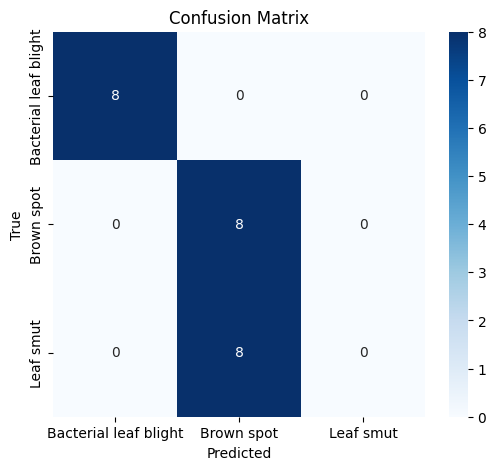

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Step 6: Save the Trained Model

In [ ]:
model.save('/content/drive/MyDrive/rice_leaf_model.keras')

